# EDA 1 - get to baseline

In [1]:
import pandas as pd

from src.helpers import *

In [2]:
# import data from the application_train

df = pd.read_csv('data/application_train.csv')

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# check the datatypes and nulls

df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [4]:
# check if there are duplicates in SK_ID_CURR

df['SK_ID_CURR'].duplicated().sum()

np.int64(0)

- there are no duplicates

In [5]:
# check if the target class is balanced

df['TARGET'].value_counts() / df['TARGET'].shape

TARGET
0    0.919271
1    0.080729
Name: count, dtype: float64

- the class is imbalanced

In [6]:
# drop features that have more than 10% nulls

df_drop = df.dropna(thresh=df.shape[0] * 0.9, axis=1)

df_drop.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [7]:
# drop the remaining null observation rows

df_drop = df_drop.dropna()

df_drop.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 304531 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   304531 non-null  int64  
 1   TARGET                       304531 non-null  int64  
 2   NAME_CONTRACT_TYPE           304531 non-null  object 
 3   CODE_GENDER                  304531 non-null  object 
 4   FLAG_OWN_CAR                 304531 non-null  object 
 5   FLAG_OWN_REALTY              304531 non-null  object 
 6   CNT_CHILDREN                 304531 non-null  int64  
 7   AMT_INCOME_TOTAL             304531 non-null  float64
 8   AMT_CREDIT                   304531 non-null  float64
 9   AMT_ANNUITY                  304531 non-null  float64
 10  AMT_GOODS_PRICE              304531 non-null  float64
 11  NAME_TYPE_SUITE              304531 non-null  object 
 12  NAME_INCOME_TYPE             304531 non-null  object 
 13  NAME

In [8]:
# check the features that are type 'object'

df_drop.select_dtypes('object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,THURSDAY,Services
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,MONDAY,XNA
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,THURSDAY,School
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,WEDNESDAY,Business Entity Type 1


In [9]:
# get the column names only

df_drop.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [10]:
# check the value counts to see it can be OneHotEncoded

df_drop['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         276613
Revolving loans     27918
Name: count, dtype: int64

In [11]:
# check the value counts to see it can be OneHotEncoded

df_drop['CODE_GENDER'].value_counts()

CODE_GENDER
F      200482
M      104045
XNA         4
Name: count, dtype: int64

In [12]:
# check the value counts to see it can be OneHotEncoded

df_drop['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    200910
Y    103621
Name: count, dtype: int64

In [13]:
# check the value counts to see it can be OneHotEncoded

df_drop['FLAG_OWN_REALTY'].value_counts()

FLAG_OWN_REALTY
Y    211641
N     92890
Name: count, dtype: int64

In [14]:
# check the value counts to see it can be OneHotEncoded

df_drop['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      247112
Family              39969
Spouse, partner     11313
Children             3249
Other_B              1757
Other_A               864
Group of people       267
Name: count, dtype: int64

In [15]:
# check the value counts to see it can be OneHotEncoded

df_drop['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 157341
Commercial associate     70794
Pensioner                54841
State servant            21504
Unemployed                  19
Student                     17
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [16]:
# check the value counts to see it can be OneHotEncoded

df_drop['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    216582
Higher education                  73821
Incomplete higher                 10175
Lower secondary                    3790
Academic degree                     163
Name: count, dtype: int64

In [17]:
# check the value counts to see it can be OneHotEncoded

df_drop['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 194660
Single / not married     44876
Civil marriage           29482
Separated                19588
Widow                    15925
Name: count, dtype: int64

In [18]:
# check the value counts to see it can be OneHotEncoded

df_drop['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      270243
With parents            14693
Municipal apartment     11079
Rented apartment         4829
Office apartment         2583
Co-op apartment          1104
Name: count, dtype: int64

In [19]:
# check the value counts to see it can be OneHotEncoded

df_drop['WEEKDAY_APPR_PROCESS_START'].value_counts()

WEEKDAY_APPR_PROCESS_START
TUESDAY      53399
WEDNESDAY    51418
MONDAY       50263
THURSDAY     50082
FRIDAY       49833
SATURDAY     33505
SUNDAY       16031
Name: count, dtype: int64

In [20]:
# check the value counts to see it can be OneHotEncoded

df_drop['ORGANIZATION_TYPE'].value_counts().count()

np.int64(58)

- all columns can be OHE encoded, but ORGANIZATION_TYPE might be better sparsely encoded, for baseline, I will not sparse encode

In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn import set_config
set_config(transform_output='pandas')

In [22]:
# create a list of object columns

object_cols = list(df_drop.select_dtypes('object').columns)
object_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [23]:
# define the encoders & preprocessor for encoding

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

preprocessor_encoding = ColumnTransformer([
  ('ohe', ohe, object_cols),
], remainder='passthrough', verbose_feature_names_out=False)

In [24]:
# save the numeric columns in a list

num_cols = [col for col in df_drop.columns if col not in object_cols]
num_cols.remove('TARGET')
num_cols.remove('SK_ID_CURR')

In [25]:
# define the scaler and preprocessor for scaling

scaler = StandardScaler()

preprocessor_scaling = ColumnTransformer([
  ('scaler', scaler, num_cols)
], remainder='passthrough', verbose_feature_names_out=False)

In [26]:
# create the preprocessing pipeline

pipe = Pipeline([
  ('preprocessor_encoding', preprocessor_encoding),
  ('preprocessor_scaling', preprocessor_scaling)
])


In [27]:
df_drop

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# drop the SK_ID_CURR

df_drop.drop(columns='SK_ID_CURR', inplace=True)
df_drop

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,0,0,0,0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,0,0,0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,0,0,0,0,0,0
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,0,0,0,0,0,0
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,0,0,0,0,0,0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# train test split

X = df_drop.drop(columns='TARGET')
y = df_drop['TARGET'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# fit and transform the train data

df_proc = pipe.fit_transform(X_train)

In [31]:
# check the processed data

df_proc

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
26470,-0.57725,0.302400,-0.035558,-0.094151,0.126109,-1.287290,-1.009836,-0.456265,1.344855,-0.444190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220853,-0.57725,0.129679,1.183253,1.283110,1.038754,0.128906,-0.122720,-0.467175,-0.953824,1.901716,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47323,-0.57725,-0.146673,0.453325,-0.140132,0.369481,0.717660,-1.062329,2.132129,-0.069913,-0.725672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
179171,-0.57725,-0.215762,-0.761733,-0.922744,-0.664850,-0.407273,1.305146,-0.453300,1.133534,0.045920,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
95685,-0.57725,0.129679,-1.108509,-0.727945,-1.090751,-0.462093,1.339989,-0.460008,0.126353,0.101554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121048,-0.57725,-0.043041,0.586047,0.423138,0.369481,0.717660,-1.491216,-0.459583,-1.871535,-0.927015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261688,2.19366,0.734201,-0.016790,0.607995,-0.238949,-0.812159,0.841187,-0.472460,-0.330656,-1.097229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133221,-0.57725,-0.043041,1.548396,1.713407,1.586341,0.128906,1.008754,-0.473493,-0.165917,-0.750178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148305,-0.57725,0.906922,1.636878,1.817486,1.586341,3.741306,-0.544043,-0.463198,-2.125176,0.681739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# check the datatypes to confirm ready for processing

df_proc.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 243624 entries, 26470 to 123143
Data columns (total 157 columns):
 #    Column                                             Non-Null Count   Dtype  
---   ------                                             --------------   -----  
 0    CNT_CHILDREN                                       243624 non-null  float64
 1    AMT_INCOME_TOTAL                                   243624 non-null  float64
 2    AMT_CREDIT                                         243624 non-null  float64
 3    AMT_ANNUITY                                        243624 non-null  float64
 4    AMT_GOODS_PRICE                                    243624 non-null  float64
 5    REGION_POPULATION_RELATIVE                         243624 non-null  float64
 6    DAYS_BIRTH                                         243624 non-null  float64
 7    DAYS_EMPLOYED                                      243624 non-null  float64
 8    DAYS_REGISTRATION                                  243624 non-n

# LogisticRegression Model

In [33]:
# import LogisticRegression for modeling

from sklearn.linear_model import LogisticRegression

In [34]:
# define pipeline for LR

lr_pipe = Pipeline([
  ('pipe', pipe),
  ('lr', LogisticRegression())
])

lr_pipe.fit(X_train, y_train)

/Users/annahan/Documents/GitHub/learning-fuze/live_class_W1D2_0125/.conda/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/annahan/Documents/GitHub/learning-fuze/live_class_W1D2_0125/.conda/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTra

Pipeline(steps=[('pipe',
                 Pipeline(steps=[('preprocessor_encoding',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   ['NAME_CONTRACT_TYPE',
                                                                    'CODE_GENDER',
                                                                    'FLAG_OWN_CAR',
                                                                    'FLAG_OWN_REALTY',
                                                                    'NAME_TYPE_SUITE',
                                                                    'NAME_INCOME_TYPE',
                                                                    'NAME_EDUCATION_TYPE',
                                                                    'NAME_FAMILY_STATUS',
                                                                    'NAME_HOUSING_...
                                                                    'HOUR_APPR_PROCESS_START',
                                                                    'REG_REGION_NOT_LIVE_REGION',
                                                                    'REG_REGION_NOT_WORK_REGION',
                                                                    'LIVE_REGION_NOT_WORK_REGION',
                                                                    'REG_CITY_NOT_LIVE_CITY',
                                                                    'REG_CITY_NOT_WORK_CITY',
                                                                    'LIVE_CITY_NOT_WORK_CITY',
                                                                    'EXT_SOURCE_2',
                                                                    'OBS_30_CNT_SOCIAL_CIRCLE',
                                                                    'DEF_30_CNT_SOCIAL_CIRCLE',
                                                                    'OBS_60_CNT_SOCIAL_CIRCLE', ...])],
                                                    verbose_feature_names_out=False))])),
                ('lr', LogisticRegression())])

Train Evaluation
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    223945
           1       0.46      0.00      0.00     19679

    accuracy                           0.92    243624
   macro avg       0.69      0.50      0.48    243624
weighted avg       0.88      0.92      0.88    243624



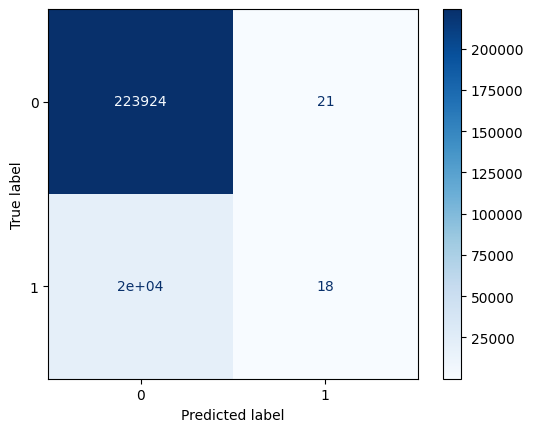

Test Evaluation
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     55919
           1       0.40      0.00      0.00      4988

    accuracy                           0.92     60907
   macro avg       0.66      0.50      0.48     60907
weighted avg       0.88      0.92      0.88     60907



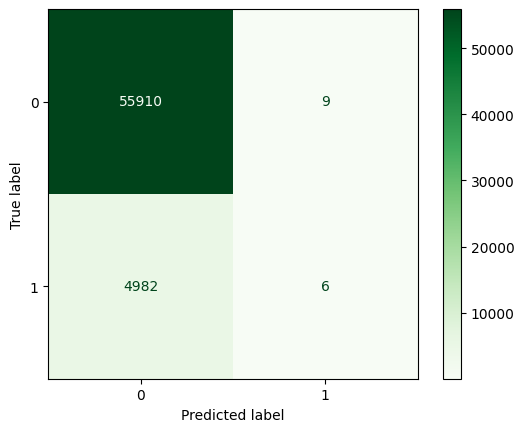

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
LR Baseline,0.919212,0.918055,0.461538,0.4,0.000915,0.001203,0.001826,0.002399


In [35]:
eval_classification(lr_pipe, X_train, y_train, X_test, y_test, model_name='LR Baseline', pos_label=1)

# Predict

In [36]:
# import test data

test_df = pd.read_csv('data/application_test.csv')

test_df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
